In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

In [2]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_df.drop(columns=['bmi'], inplace=True)

In [4]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [5]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {}
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column].astype(str))
            self.encoders[column] = le
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for column, encoder in self.encoders.items():
            X_copy[column] = encoder.transform(X_copy[column].astype(str))
        return X_copy

In [6]:
encoder = MultiColumnLabelEncoder()

In [18]:
stroke_encoded = encoder.fit_transform(stroke_df)
stroke_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,5053,1,85,0,1,1,2,1,1618,1,1
1,3218,0,79,0,0,1,3,0,1356,2,1
2,1593,1,100,0,1,1,2,0,251,2,1
3,3907,0,65,0,0,1,2,1,1153,3,1
4,530,0,98,1,0,1,3,0,1162,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,652,0,100,1,0,1,2,1,3107,2,0
5106,2641,0,101,0,0,1,3,1,798,2,0
5107,745,0,50,0,0,1,3,0,3061,2,0
5108,2105,1,68,0,0,1,2,0,1131,1,0


In [8]:
X = stroke_encoded.drop(columns=['id', 'stroke'])
y = stroke_encoded['stroke']

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.18236944, -0.16380436, -0.32984284, ..., -1.01260554,
         0.55673554,  0.58544081],
       [-0.84575934,  0.87264277, -0.32984284, ...,  0.98755138,
         1.11855479, -0.34582078],
       [ 1.18236944,  0.65671628,  3.03174692, ..., -1.01260554,
        -0.5634188 ,  0.58544081],
       ...,
       [-0.84575934, -0.72521321, -0.32984284, ..., -1.01260554,
         0.4792132 ,  0.58544081],
       [-0.84575934, -0.07743376, -0.32984284, ..., -1.01260554,
        -0.51551173,  1.5167024 ],
       [-0.84575934,  1.00219866, -0.32984284, ..., -1.01260554,
        -0.58083955, -1.27708237]])

In [11]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.84575934, -0.20698965, -0.32984284, ..., -1.01260554,
        -1.3882914 , -0.34582078],
       [-0.84575934,  1.47723692, -0.32984284, ...,  0.98755138,
         0.57938252, -0.34582078],
       [ 1.18236944, -0.8979544 , -0.32984284, ...,  0.98755138,
         0.32591058,  1.5167024 ],
       ...,
       [ 1.18236944, -0.81158381, -0.32984284, ...,  0.98755138,
         0.75794523, -1.27708237],
       [-0.84575934, -0.98432499, -0.32984284, ...,  0.98755138,
         1.1211679 ,  0.58544081],
       [-0.84575934, -2.15032801, -0.32984284, ...,  0.98755138,
         0.97831774, -1.27708237]])

In [12]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [13]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9045383411580594


In [16]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9374021909233177


/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

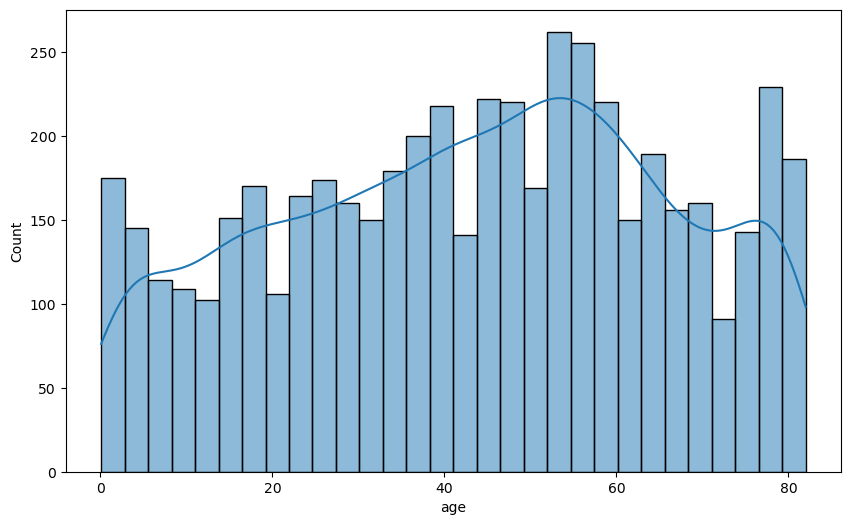

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(stroke_df.age,kde=True,bins=30)

/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Figure size 1000x600 with 0 Axes>

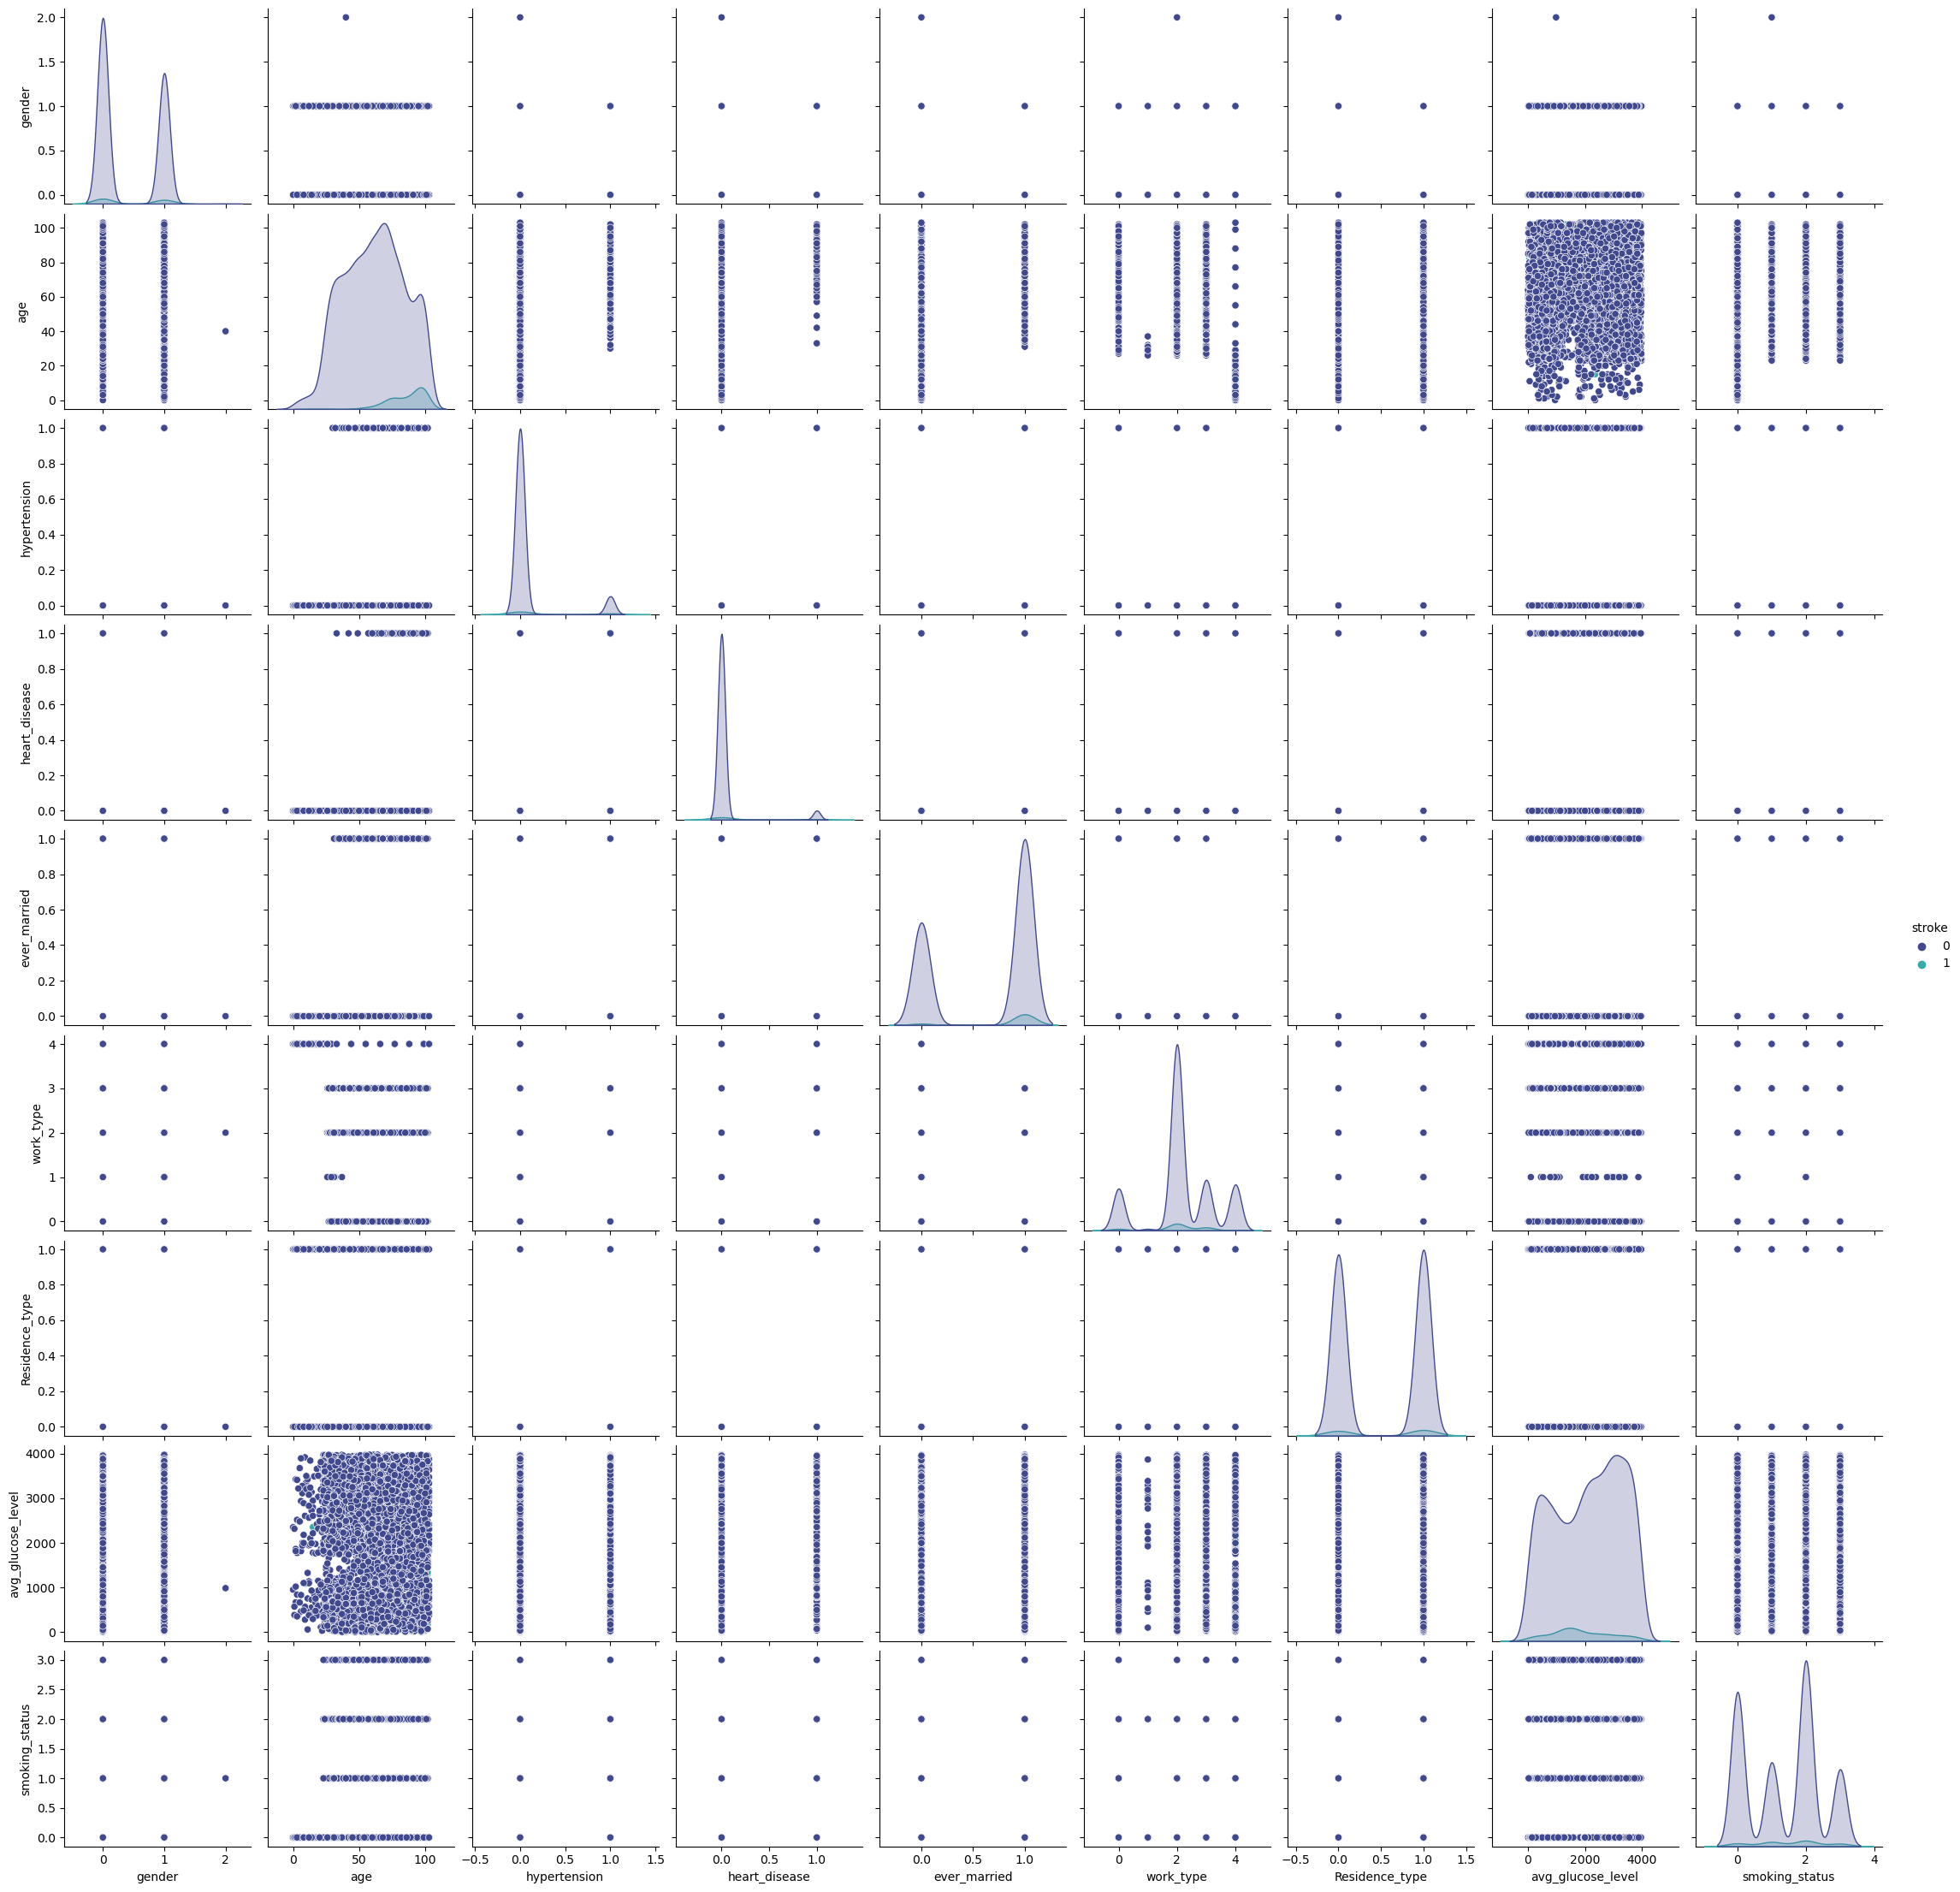

In [31]:
plt.figure(figsize=(10,6))
sns.pairplot(stroke_enc_corr,hue='stroke',palette='mako')

<Axes: >

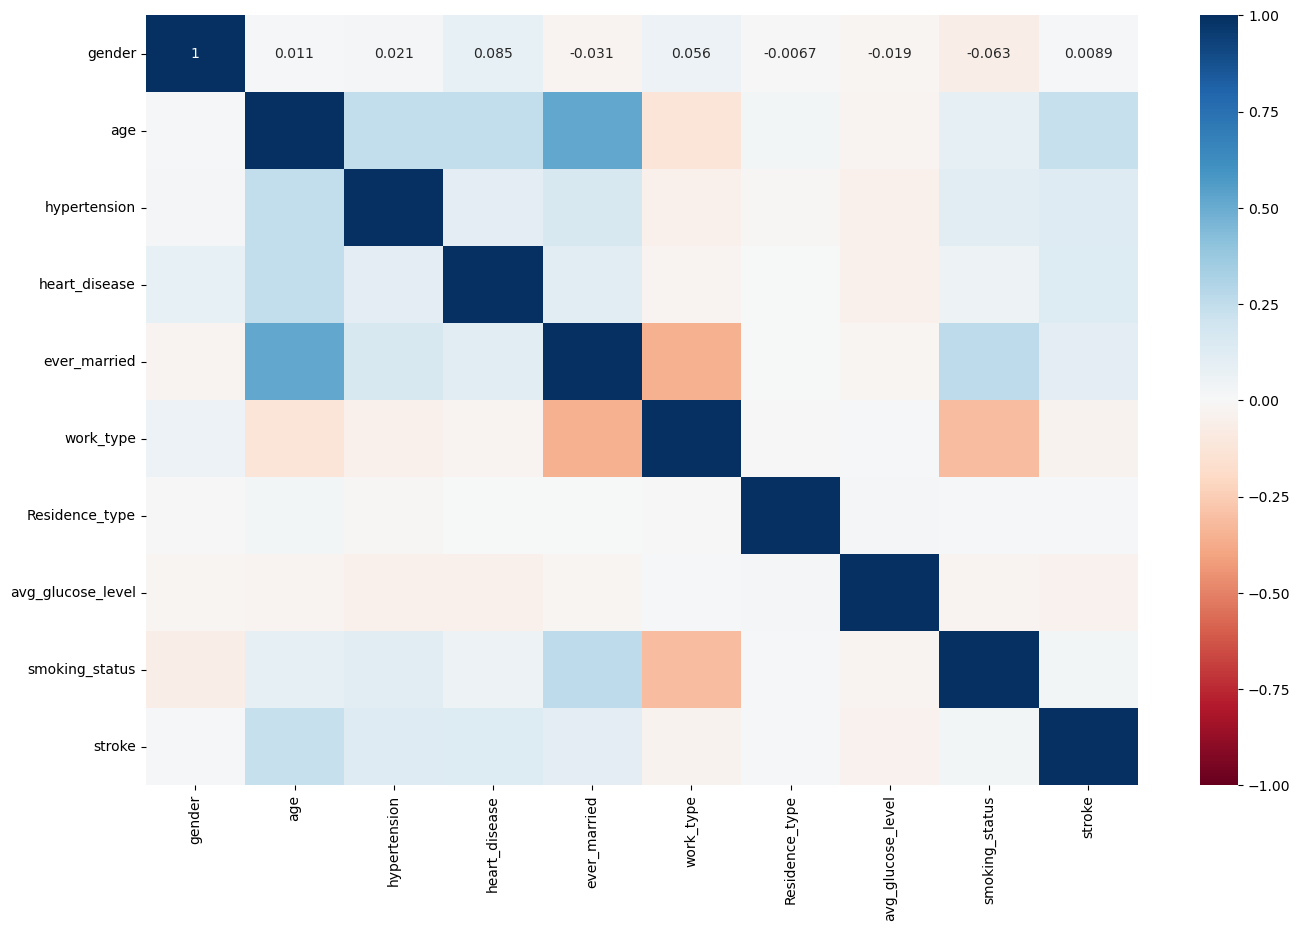

In [30]:
# Correlation
stroke_enc_corr = stroke_encoded.drop(columns=['id'])
corr_df = stroke_enc_corr.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_df, annot = True, cmap='RdBu', vmin=-1, vmax=1)